## Applied Data Science Capstone Project PART 2

# Analytics: Counter Strike:Global Offensive

Working Code for the project is as follows:

### 1) Installing necessary libraries and tools

In [4]:
pip install lxml

     |████████████████████████████████| 5.5MB 6.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install beautifulsoup4


     |████████████████████████████████| 122kB 16.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


Importing all the downloaded libraries

In [8]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import urllib.request
import re

### 2) Parsing the data from site

**This section was perhaps the most difficult for me because I didnt had prior knowledge of coding. The parsing was tricky and in order to maximise efficiency I was successful in creating the following code and I am quite proud of it :)** 

The site consists of list of hyperlinks. Each hyperlink lead to the page containing data of one/single match.

In [6]:
masterlink = 'https://www.hltv.org/results?offset=8000'
mastersource = requests.get(masterlink).text
mastersoup = BeautifulSoup(mastersource,'lxml')
for foxtrot in mastersoup.find_all(class_='results-holder'):
    print(foxtrot.prettify())

<div class="results-holder">
 <div class="results-all" data-zonedgrouping-group-classes="results-sublist" data-zonedgrouping-headline-classes="standard-headline" data-zonedgrouping-headline-format="'Results for' MMMM do y">
  <div class="results-sublist">
   <span class="standard-headline">
    Results for May 19th 2019
   </span>
   <div class="result-con" data-zonedgrouping-entry-unix="1558272840000">
    <a class="a-reset" href="/matches/2333178/valiance-vs-g2-dreamhack-open-tours-2019">
     <div class="result">
      <table>
       <tr>
        <td class="team-cell">
         <div class="line-align team1">
          <div class="team team-won">
           Valiance
          </div>
          <img alt="Valiance" class="team-logo" src="https://static.hltv.org/images/team/logo/8481" title="Valiance"/>
         </div>
        </td>
        <td class="result-score">
         <span class="score-won">
          2
         </span>
         -
         <span class="score-lost">
          1
  

**O**     The first parser finds the link from the master site and then treats it as the source for the parsing of data of the link

In [7]:
#a class="a-reset" href
#class_='"a-reset" href' result-con
linktable=""
for Glink in foxtrot.find_all(class_='results-sublist'):
    for Finlink in Glink.find_all(class_='result-con'):
        dark = Finlink.find('a', href=True)
        superlink = dark['href']
        #print(superlink)
        ############
        http = 'https://www.hltv.org'+superlink
        source = requests.get(http).text
        soup = BeautifulSoup(source,'lxml')
        charlie = soup.find(class_='flexbox-column')
        tableT = ""
        tableCT = ""

        for Gmap in charlie.find_all(class_='mapholder'):
            Mapname = Gmap.find(class_='mapname').text
            for scoreFT in Gmap.find_all(class_='t'):
                alpha = (Mapname +","+ scoreFT.text + ",T side")
                tableT = tableT + alpha + '\n'

            for scoreFCT in Gmap.find_all(class_='ct'):
                beta = (Mapname +","+ scoreFCT.text + ",CT side")
                tableCT = tableCT + beta + '\n'
       #print(table)
        csgoTable = tableT + tableCT
        #print(csgoTable)
        
        ####################
        linktable = linktable + csgoTable

**O**  The 'linktable' consists of the final dataset

In [8]:
print(linktable)

Nuke,7,T side
Nuke,0,T side
Vertigo,11,T side
Vertigo,9,T side
Dust2,6,T side
Dust2,6,T side
Nuke,8,CT side
Nuke,9,CT side
Vertigo,4,CT side
Vertigo,5,CT side
Dust2,9,CT side
Dust2,9,CT side
Nuke,5,T side
Nuke,4,T side
Nuke,10,CT side
Nuke,11,CT side
Train,8,T side
Train,1,T side
Dust2,9,T side
Dust2,1,T side
Train,7,CT side
Train,8,CT side
Dust2,6,CT side
Dust2,7,CT side
Train,9,T side
Train,10,T side
Nuke,2,T side
Nuke,3,T side
Train,6,CT side
Train,5,CT side
Nuke,13,CT side
Nuke,4,CT side
Vertigo,11,T side
Vertigo,8,T side
Train,6,T side
Train,3,T side
Vertigo,4,CT side
Vertigo,5,CT side
Train,9,CT side
Train,10,CT side
Nuke,14,T side
Nuke,3,T side
Inferno,9,T side
Inferno,10,T side
Nuke,1,CT side
Nuke,2,CT side
Inferno,6,CT side
Inferno,2,CT side
Nuke,6,T side
Nuke,7,T side
Cache,3,T side
Cache,4,T side
Nuke,9,CT side
Nuke,7,CT side
Cache,12,CT side
Cache,8,CT side
Inferno,12,T side
Inferno,2,T side
Nuke,6,T side
Nuke,7,T side
Dust2,5,T side
Dust2,6,T side
Inferno,3,CT side
Inferno

### 3) Creating a csv file and Dataframe

In [9]:
csvname = "CSGOdataset8.csv"
j=[0,1]
for i in j:
    file=open(csvname,"wb")
    file.write(bytes(linktable,encoding="ascii",errors="ignore"))

In [9]:
df = pd.read_csv('CSGOdataset8.csv')
df.columns=["MapName","Wins","Side"]
#df.columns=["MapName","Wins","Side"]
#df.head

df.head()

,MapName,Wins,Side
0,Nuke,0,T side
1,Vertigo,11,T side
2,Vertigo,9,T side
3,Dust2,6,T side
4,Dust2,6,T side


### 4) Visualization of Dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure
from pylab import rcParams

In [29]:
df.columns

Index(['MapName', 'Wins', 'Side'], dtype='object')

The number of CT and T sided elements are equal so that any bias would be avoided

In [18]:
df['Side'].value_counts()

CT side    370
T side     369
Name: Side, dtype: int64

Most played maps can be given as:

In [19]:
df['MapName'].value_counts()

Mirage      140
Inferno     132
Nuke        119
Dust2       104
Train       100
Overpass     84
Vertigo      48
Cache        12
Name: MapName, dtype: int64

### Preparing the dataset

In [10]:
infy=df[df['MapName']=='Inferno']
dust2=df[df['MapName']=='Dust2']
nuke=df[df['MapName']=='Nuke']
ovps=df[df['MapName']=='Overpass']
mirg=df[df['MapName']=='Mirage']
train=df[df['MapName']=='Train']
vert=df[df['MapName']=='Vertigo']

infy.head(10)

,MapName,Wins,Side
41,Inferno,9,T side
42,Inferno,10,T side
45,Inferno,6,CT side
46,Inferno,2,CT side
55,Inferno,12,T side
56,Inferno,2,T side
61,Inferno,3,CT side
62,Inferno,4,CT side
71,Inferno,5,T side
72,Inferno,6,T side


In [31]:
infyCT=infy[infy['Side']=='CT side']
infyT=infy[infy['Side']=='T side']

dust2CT=dust2[dust2['Side']=='CT side']
dust2T=dust2[dust2['Side']=='T side']

nukeCT=nuke[nuke['Side']=='CT side']
nukeT=nuke[nuke['Side']=='T side']

ovpsCT=ovps[ovps['Side']=='CT side']
ovpsT=ovps[ovps['Side']=='T side']

mirgCT=mirg[mirg['Side']=='CT side']
mirgT=mirg[mirg['Side']=='T side']

trainCT=train[train['Side']=='CT side']
trainT=train[train['Side']=='T side']

vertCT=vert[vert['Side']=='CT side']
vertT=vert[vert['Side']=='T side']

In [32]:
infyT['Wins'].value_counts()

7     9
5     8
9     7
8     6
3     6
10    5
6     5
2     5
4     4
12    3
1     3
11    2
14    1
13    1
0     1
Name: Wins, dtype: int64

In [33]:
print(infyCT['Wins'].mean()*1)
print(infyT['Wins'].mean()*1)

6.121212121212121
6.454545454545454


In [34]:
print(dust2CT.mean()*1)
print(dust2T.mean()*1)

Wins    6.653846
dtype: float64
Wins    6.538462
dtype: float64


In [35]:
print(nukeCT.mean()*1)
print(nukeT.mean()*1)

Wins    7.283333
dtype: float64
Wins    5.559322
dtype: float64


In [36]:
print(ovpsCT.mean()*1)
print(ovpsT.mean()*1)

Wins    6.452381
dtype: float64
Wins    6.071429
dtype: float64


In [37]:
print(mirgCT.mean()*1)
print(mirgT.mean()*1)

Wins    7.142857
dtype: float64
Wins    5.771429
dtype: float64


In [38]:
print(trainCT.mean()*1)
print(trainT.mean()*1)

Wins    7.56
dtype: float64
Wins    5.48
dtype: float64


In [39]:
print(vertCT.mean()*1)
print(vertT.mean()*1)

Wins    5.291667
dtype: float64
Wins    7.958333
dtype: float64


In [40]:
dfnew={'Map': ['Inferno','Dust 2','Nuke','Overpass','Mirage','Train','Vertigo'],
       'Avg Wins CT-side':[  (infyCT['Wins'].mean()*1),  (dust2CT['Wins'].mean()*1),  (nukeCT['Wins'].mean()*1),
                             (ovpsCT['Wins'].mean()),  (mirgCT['Wins'].mean()),  (trainCT['Wins'].mean()),  (vertCT['Wins'].mean())],
       'Avg Wins T-side':[  (infyT['Wins'].mean()*1),  (dust2T['Wins'].mean()*1),  (nukeT['Wins'].mean()*1),
                             (ovpsT['Wins'].mean()),  (mirgT['Wins'].mean()),  (trainT['Wins'].mean()),  (vertT['Wins'].mean())]}
dfzo = pd.DataFrame (dfnew, columns = ['Map','Avg Wins CT-side','Avg Wins T-side'])

**O**   The final dataset

In [41]:
dfzo.head(8)

,Map,Avg Wins CT-side,Avg Wins T-side
0,Inferno,6.121212,6.454545
1,Dust 2,6.653846,6.538462
2,Nuke,7.283333,5.559322
3,Overpass,6.452381,6.071429
4,Mirage,7.142857,5.771429
5,Train,7.560000,5.480000
6,Vertigo,5.291667,7.958333


In [42]:
rcParams['figure.figsize'] = 9, 6

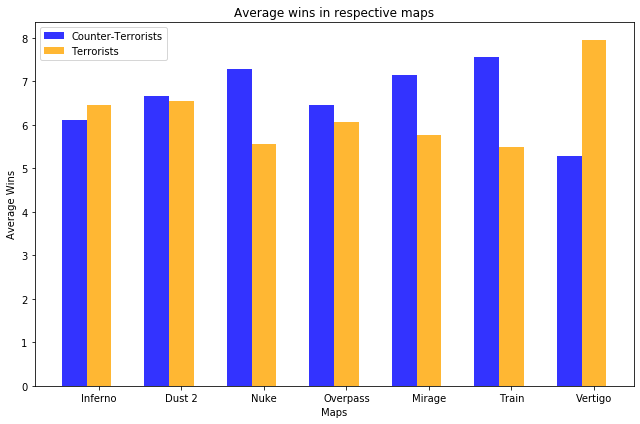

In [44]:
# data to plot
n_groups = 7
means_frank = dfzo['Avg Wins CT-side']
means_guido = dfzo['Avg Wins T-side']

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
                alpha=opacity,
                color='blue',
                label='Counter-Terrorists')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
                alpha=opacity,
                color='orange',
                label='Terrorists')

plt.xlabel('Maps')
plt.ylabel('Average Wins')
plt.title('Average wins in respective maps')
plt.xticks(index + bar_width, dfzo['Map'])
plt.legend()

plt.tight_layout()
plt.show()

**O** Thus we obtain a simple BarGraph that shows which of the Maps generally produce Wins for the respective sides

-----------------------------------------